# Understanding the Impact of Ozempic on Obese and Hypertensive Patients

## Exploratory Data Analysis (EDA)liers

In [3]:
pip install py7zr

   ---------------------------------------- 0.0/67.0 kB ? eta -:--:--
   ---------------------------------------- 67.0/67.0 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/357.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/357.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/357.3 kB ? eta -:--:--
   --- ----------------------------------- 30.7/357.3 kB 163.8 kB/s eta 0:00:02
   ------------- ------------------------ 122.9/357.3 kB 654.9 kB/s eta 0:00:01
   --------------- ---------------------- 143.4/357.3 kB 708.1 kB/s eta 0:00:01
   --------------- ---------------------- 143.4/357.3 kB 708.1 kB/s eta 0:00:01
   -------------------- ----------------- 194.6/357.3 kB 620.6 kB/s eta 0:00:01
   ------------------------- ------------ 235.5/357.3 kB 600.7 kB/s eta 0:00:01
   ----------------------------- -------- 276.5/357.3 kB 654.2 kB/s eta 0:00:01
   -------------------------------------  348.2/357.3 kB 744.3 kB/s eta 0:00:


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#Loading required libraries
import pandas as pd
import  py7zr
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [17]:
#File path for mediacl small .7z 
file_path = r'C:\Users\SANTOSH VIJAYVARGIA\OneDrive\Desktop\UC Davis\Winter\Machine Learning\Homework 4\longyear-obese-hypertensive-40-57-medical-SMALL-sample.7z'

#Open the file
with py7zr.SevenZipFile(file_path, mode='r') as z:
    all_files = z.getnames()
    # Assuming there's only one CSV file in the .7z archive
    csv_file_name = all_files[0]
    # Extract the CSV file to memory
    csv_file_dict = z.read([csv_file_name])
    csv_file = csv_file_dict[csv_file_name]

#Load the csv data into df
medical_data = pd.read_csv(csv_file)

#File path for script small .7z 
file_path = r'C:\Users\SANTOSH VIJAYVARGIA\OneDrive\Desktop\UC Davis\Winter\Machine Learning\Homework 4\longyear-obese-hypertensive-40-75-scripts-SMALL-sample.7z'

#Open the file
with py7zr.SevenZipFile(file_path, mode='r') as z:
    all_files = z.getnames()
    # Assuming there's only one CSV file in the .7z archive
    csv_file_name = all_files[0]
    # Extract the CSV file to memory
    csv_file_dict = z.read([csv_file_name])
    csv_file = csv_file_dict[csv_file_name]

#Load the csv data into df
dtype_options = {'prescriber_npi': str, 'primary_care_npi': str, 'unit_of_measure': str, 'reject_code_4':str}
script_data = pd.read_csv(csv_file, low_memory=False)


In [18]:
#Exploring datasets
medical_data.head()
medical_data.info()
script_data.head()
script_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [19]:
#display one code assigned to Ozempic
filter_df = medical_data[medical_data['proc_code'] == "J3490"]
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 216 to 622748
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         772 non-null    object 
 1   episode_id         772 non-null    object 
 2   visit_id           772 non-null    object 
 3   encounter_id       772 non-null    object 
 4   claim_date         772 non-null    object 
 5   patient_state      772 non-null    object 
 6   patient_short_zip  772 non-null    float64
 7   patient_age        750 non-null    float64
 8   patient_gender     772 non-null    object 
 9   place_of_service   203 non-null    object 
 10  visit_type         752 non-null    object 
 11  payor              749 non-null    object 
 12  payor_channel      729 non-null    object 
 13  ref_npi            171 non-null    float64
 14  hcp_npi            660 non-null    float64
 15  hcp_taxonomy       658 non-null    object 
 16  hcp_specialty      658 non

#### Display first 3 dignosis for all users in medical data

In [20]:
#Seleting 'diag_' columns
diag_columns = [col for col in medical_data.columns if col.startswith('diag_')]
df_diag = medical_data[diag_columns]

#Combining values 
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

#Processing first three digits
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1


In [21]:
import operator
#Sorting dictinary items by count in descending order of top occurences for different diagnosis
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

#looping through all
for items in sorted_counts:
    print(items)

('E11', 233629)
('I10', 199537)
('E78', 113939)
('Z00', 95083)
('E66', 69689)
('Z68', 54013)
('M25', 51750)
('M54', 50447)
('Z12', 32396)
('N18', 31950)
('Z01', 30622)
('Z13', 29844)
('M79', 29497)
('G47', 28339)
('R10', 27659)
('Z79', 27149)
('E55', 27085)
('Z71', 26523)
('R07', 25175)
('E03', 24910)
('R73', 24776)
('N39', 22340)
('M17', 21592)
('D64', 19973)
('I25', 17483)
('Z20', 16871)
('R53', 16402)
('I50', 15359)
('R06', 15340)
('J44', 14592)
('F41', 13833)
('Z23', 13598)
('I48', 12605)
('K21', 12366)
('G89', 11753)
('Z11', 11720)
('I11', 11344)
('F33', 10927)
('N40', 10720)
('J45', 10699)
('E87', 10668)
('M19', 10218)
('U07', 10043)
('M47', 9806)
('R68', 9479)
('A41', 9416)
('D50', 9387)
('J96', 9330)
('R05', 9106)
('M51', 8942)
('F32', 8895)
('I12', 8183)
('L03', 7899)
('B35', 7878)
('R79', 7617)
('Z51', 7527)
('R51', 7323)
('K76', 7175)
('Z76', 7142)
('R42', 7133)
('N17', 7130)
('H25', 7047)
('L97', 7010)
('M48', 6829)
('M62', 6795)
('R00', 6751)
('F17', 6672)
('C50', 6663)
('

Top 5 disgnostics are:
1. E11 - Type 2 diabetes mellitus
2. I10 - Essential hypertension
3. E78 - Disorders of lipoprotien metabolism and other lipidemias
4. Z00 - Encounter for general examination without compaint
5. E66 - Overweight and obesity

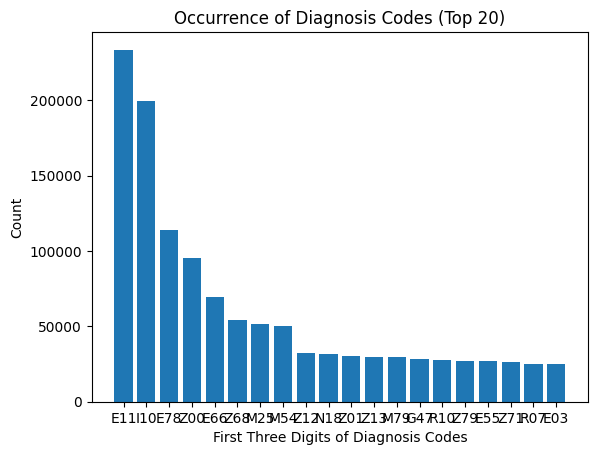

In [23]:
#Extracting labels and values for top 20 diagnostics
top_n = 20 
labels = [item[0] for item in sorted_counts[:top_n]]
values = [item[1] for item in sorted_counts[:top_n]]

#Plotting the bar chart
plt.bar(labels, values)

plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes (Top 20)")

plt.show()


The first three digits of the most common diagnosis are : E11 , I10, E78. These codes appear over 100,000 times each.

#### Display first three diagnosis with OZP users using the filetr_df, which contains diagnoses specifically for OZP users with the procedure code 

#### J3490, indicating a type of OZP treatment

In [24]:
#Seleting 'diag_' columns
diag_columns = [col for col in filter_df.columns if col.startswith('diag_')]
df_diag = filter_df[diag_columns]

#Combining values
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

#Processing first three digits
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('I10', 249)
('E11', 229)
('E78', 139)
('N18', 100)
('I25', 91)
('M54', 81)
('E66', 75)
('Z79', 72)
('R07', 71)
('Z51', 64)
('I48', 56)
('J45', 50)
('G89', 49)
('M19', 46)
('M25', 44)
('R10', 44)
('D68', 40)
('F41', 37)
('Z99', 36)
('K21', 35)
('H25', 34)
('Z68', 34)
('J44', 33)
('Z30', 33)
('M17', 32)
('M47', 28)
('C50', 28)
('D50', 27)
('M79', 27)
('Z87', 26)
('Z88', 25)
('N25', 25)
('R51', 24)
('G47', 23)
('E03', 23)
('M48', 22)
('F33', 22)
('R06', 20)
('R94', 20)
('Z85', 19)
('Z20', 19)
('J20', 19)
('F17', 19)
('I50', 18)
('K29', 18)
('F32', 18)
('Z86', 17)
('M51', 17)
('I12', 17)
('R11', 16)
('M70', 16)
('N20', 16)
('I11', 16)
('K57', 15)
('K44', 15)
('K59', 15)
('C61', 15)
('Z90', 15)
('N13', 15)
('I49', 14)
('Z11', 14)
('Z01', 14)
('D63', 14)
('F31', 14)
('L02', 14)
('G43', 12)
('K80', 12)
('M16', 12)
('D64', 12)
('R05', 12)
('J30', 12)
('R26', 12)
('H40', 12)
('K43', 12)
('R19', 12)
('N39', 12)
('K40', 12)
('R52', 12)
('Z95', 11)
('C77', 11)
('D25', 11)
('N95', 11)
('T85', 11)


Top 7 OCC for OZP users
1. I10: Essential (primary) hypertension
2. E11: Type 2 diabetes mellitus
3. E78: Disorders of lipoprotein metabolism and other lipidemia
4. N18: Chronic kidney disease
6. I25: Chronic ischemic heart disease
7. M54: Dorsalgia
8. E66: Overweight and Obesity

We Observe a change in ranking of diagnosis for OZP users. For users undergoing OZP treatment, the primary diagnosis is I10, hypertension, while for the entire population, the most common diagnosis is Type 2 diabetes mellitus

### Find the zipcode association with diagnosis for All

In [25]:
#Selecting diag columns
df_zipcode = medical_data['patient_short_zip']

#combining values
combined_list = df_zipcode.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

#Processing first three digits
zips = {}
for diag_code in combined_list:
    zips[diag_code] = zips.get(diag_code, 0) + 1

In [26]:
#Sorting the dictionary items by count
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

(900.0, 180469)
(922.0, 166422)
(908.0, 55562)
(921.0, 51190)
(910.0, 48395)
(913.0, 34571)
(912.0, 34143)
(911.0, 32244)
(853.0, 6499)
(857.0, 2952)
(852.0, 2399)
(864.0, 1480)
(856.0, 1456)
(350.0, 1259)
(351.0, 637)
(352.0, 530)
(863.0, 495)
(859.0, 447)
(855.0, 430)
(995.0, 370)
(996.0, 359)
(860.0, 311)
(997.0, 291)
(344.0, 58)
(194.0, 42)
(850.0, 39)
(272.0, 33)
(891.0, 32)
(923.0, 25)
(304.0, 25)
(998.0, 23)
(320.0, 22)
(91.0, 22)
(629.0, 18)
(606.0, 18)
(770.0, 17)
(105.0, 15)
(787.0, 12)
(841.0, 12)
(895.0, 9)
(483.0, 9)
(333.0, 9)
(328.0, 8)
(527.0, 8)
(112.0, 8)
(370.0, 8)
(372.0, 7)
(773.0, 7)
(722.0, 7)
(170.0, 7)
(330.0, 6)
(924.0, 6)
(334.0, 6)
(528.0, 5)
(720.0, 5)
(752.0, 4)
(776.0, 4)
(524.0, 4)
(337.0, 4)
(612.0, 3)
(999.0, 3)
(88.0, 3)
(503.0, 3)
(619.0, 3)
(890.0, 3)
(933.0, 2)
(774.0, 2)
(631.0, 2)
(74.0, 2)
(478.0, 2)
(782.0, 2)
(523.0, 2)
(917.0, 2)
(554.0, 2)
(200.0, 2)
(442.0, 2)
(109.0, 1)
(481.0, 1)
(925.0, 1)
(610.0, 1)
(495.0, 1)
(321.0, 1)
(427.0, 1)
(616

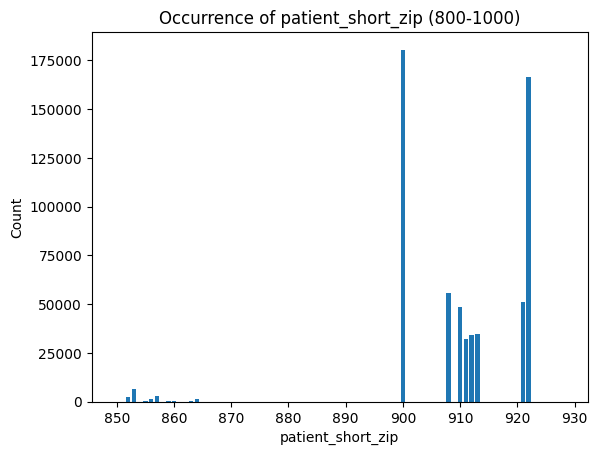

In [27]:
#Filtering labels and values for zip codes between 800 and 1000
filtered_counts = [item for item in sorted_counts if 850 <= int(item[0]) <= 930]

#Extracting labels and values
labels = [item[0] for item in filtered_counts]
values = [item[1] for item in filtered_counts]

#Creating the bar chart
plt.bar(labels, values)

plt.xlabel("patient_short_zip")
plt.ylabel("Count")
plt.title("Occurrence of patient_short_zip (800-1000)")

plt.show()

We can see that most of patients come from following areas:
1. 900 - LA
2. 922 - Indio
3. 908 - long beach
4. 921 - San Diego
5. 910 - Pasadena

### To find the zip codes associated with OZP users

In [29]:
#Selecting 'diag_' columns
df_zip = filter_df['patient_short_zip']

#Combining values
combined_list = df_zip.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

#Processing first three digits
zips = {}
for diag_code in combined_list:
    zips[diag_code] = zips.get(diag_code, 0) + 1

sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

(921.0, 288)
(922.0, 140)
(908.0, 128)
(910.0, 93)
(911.0, 49)
(912.0, 47)
(853.0, 12)
(852.0, 7)
(864.0, 3)
(350.0, 2)
(857.0, 2)
(859.0, 1)


We see the same results with filtered data for the users of OZP in differentzip codes as we did earlier

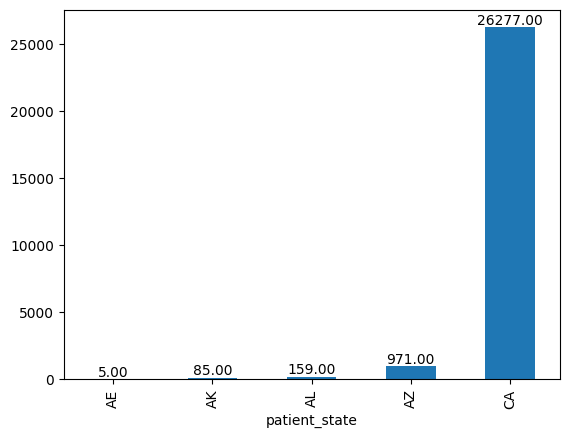

In [31]:
#Check the no. of pateint's states
patient_state_cnt = medical_data.groupby('patient_state')['journey_id'].nunique()

#Plot a bar chart
patient_state_cnt.plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

In [32]:
#We are interested in patients with obesity
#dataset for users with obesity
df_obesity = medical_data[medical_data['diag_1'].str.startswith("E66")|
      medical_data['diag_2'].str.startswith("E66")|
      medical_data['diag_3'].str.startswith("E66")|
      medical_data['diag_4'].str.startswith("E66")|
      medical_data['diag_5'].str.startswith("E66")]

df_obesity['diag'] = "Obesity"
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63026 entries, 22 to 623506
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         63026 non-null  object 
 1   episode_id         63026 non-null  object 
 2   visit_id           62900 non-null  object 
 3   encounter_id       63026 non-null  object 
 4   claim_date         63026 non-null  object 
 5   patient_state      63026 non-null  object 
 6   patient_short_zip  63018 non-null  float64
 7   patient_age        62224 non-null  float64
 8   patient_gender     63023 non-null  object 
 9   place_of_service   50211 non-null  object 
 10  visit_type         59858 non-null  object 
 11  payor              60251 non-null  object 
 12  payor_channel      58314 non-null  object 
 13  ref_npi            24221 non-null  float64
 14  hcp_npi            49907 non-null  float64
 15  hcp_taxonomy       49357 non-null  object 
 16  hcp_specialty      49357 

C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_22964\2810372161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['diag'] = "Obesity"


In [33]:
#Gender Breakdown for OZP users
patients_gender_cnt = df_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Obesity,F,6422,0.587235
1,Obesity,M,4514,0.412765


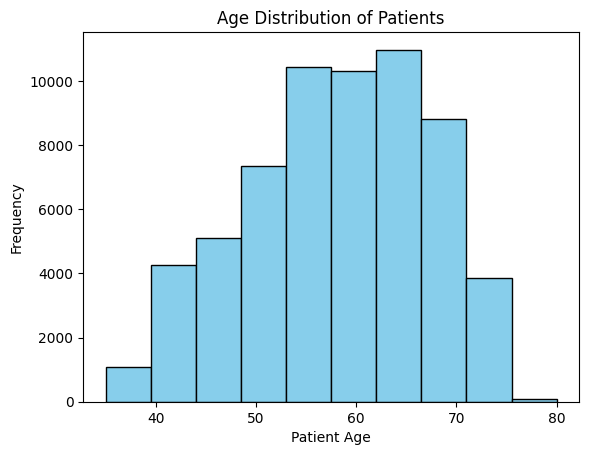

In [34]:
#Age distribution of patients
plt.hist(df_obesity['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

plt.show()

(array([ 8920.,     0., 17393.,     0.,     0.,     0.,     0., 20270.,
            0., 16443.]),
 array([2019. , 2019.4, 2019.8, 2020.2, 2020.6, 2021. , 2021.4, 2021.8,
        2022.2, 2022.6, 2023. ]),
 <BarContainer object of 10 artists>)

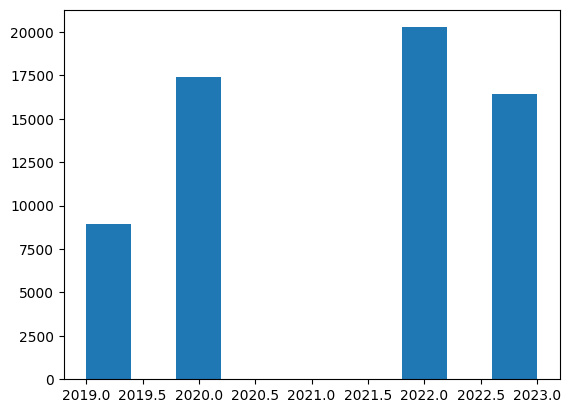

In [35]:
#date of the treatments
plt.hist(pd.to_datetime(df_obesity['claim_date']).dt.year)

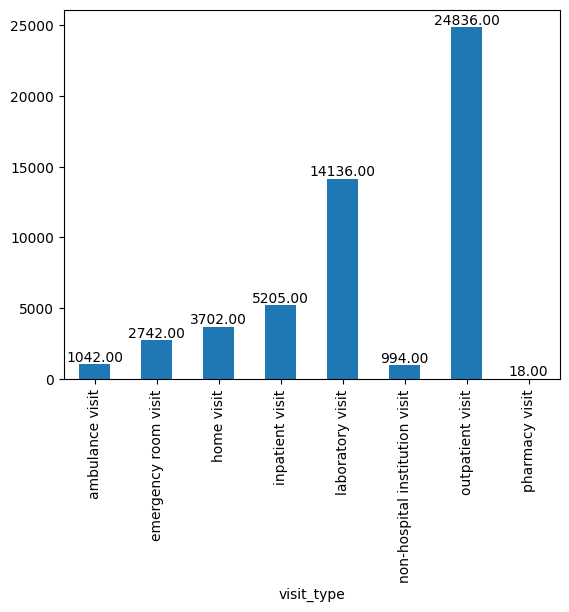

In [37]:
#Checking the number of patients and their types of visits
patient_state_cnt = medical_data.groupby('visit_type')['journey_id'].nunique()

patient_state_cnt .plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

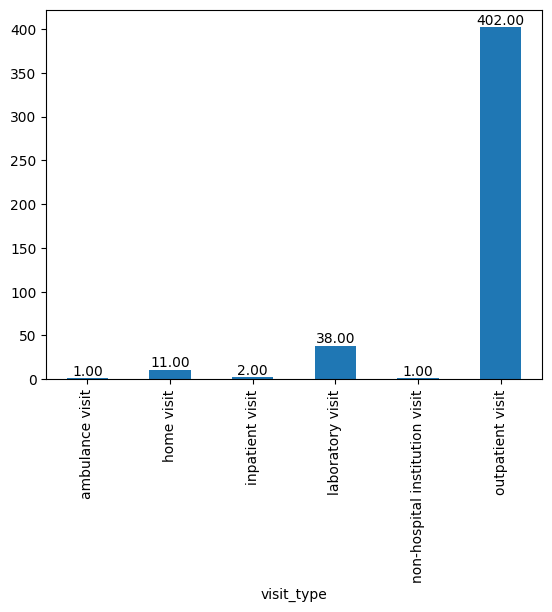

In [39]:
#Checking the number of patients and their types of visits
patient_state_cnt = filter_df.groupby('visit_type')['journey_id'].nunique()

patient_state_cnt .plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

In the baove two charts the number of oupatient visits is the highest

In [41]:
df_hyper = medical_data[medical_data['diag_1'].str.startswith("I10")|
      medical_data['diag_2'].str.startswith("I10")|
      medical_data['diag_3'].str.startswith("I10")|
      medical_data['diag_4'].str.startswith("I10")|
      medical_data['diag_5'].str.startswith("I10")]


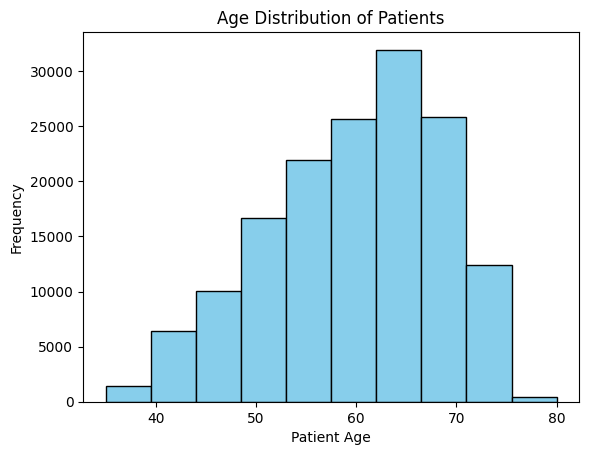

In [42]:
#Age distribution of patients
plt.hist(df_hyper['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

plt.show()

## Data Preprocessing and Merging:is.

We are interested in the following diagnosis

E66 Overwieght and obesity
I10 Essential primary hypertension

In [43]:
#Selecting patients with obesity and hypertension
medical_data = medical_data[
    (medical_data[['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']]
     .applymap(lambda val: str(val).startswith(('E66', 'I10')))
     .any(axis=1))
]

#Fetching medical records of pateints between the age 45 and 75
medical_data = medical_data[(medical_data['patient_age'] > 45) & (medical_data['patient_age'] <= 75)]

C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_22964\3507377760.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda val: str(val).startswith(('E66', 'I10')))


In [44]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160011 entries, 6 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         160011 non-null  object 
 1   episode_id         160011 non-null  object 
 2   visit_id           159823 non-null  object 
 3   encounter_id       160011 non-null  object 
 4   claim_date         160011 non-null  object 
 5   patient_state      160011 non-null  object 
 6   patient_short_zip  160011 non-null  float64
 7   patient_age        160011 non-null  float64
 8   patient_gender     160011 non-null  object 
 9   place_of_service   123999 non-null  object 
 10  visit_type         154053 non-null  object 
 11  payor              154325 non-null  object 
 12  payor_channel      147906 non-null  object 
 13  ref_npi            69269 non-null   float64
 14  hcp_npi            116580 non-null  float64
 15  hcp_taxonomy       115325 non-null  object 
 16  hcp_spe

In [46]:
#Fetching columns for merging dataset
new_medical_df = medical_data[['journey_id', 'claim_date', 'patient_gender','patient_short_zip','patient_age', 'payor_channel','diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'visit_type','proc_code','smart_allowed','place_of_service']]
new_scripts_df = script_data[['journey_id', 'ndc', 'date_prescription_written', 'number_of_refills_authorized','place_of_service','days_supply']]

In [47]:
#Chossing smart allowed as the y variable
medical_data['place_of_service'].unique()

array(['Office', nan, 'Independent Laboratory',
       'Federally Qualified Health Center', 'Independent Clinic',
       'On Campus-Outpatient Hospital', 'Inpatient Hospital',
       'Ambulance - Land', 'Emergency Room - Hospital',
       'Ambulatory Surgical Center', 'Home', 'Nursing Facility',
       'Other Place of Service', 'Group Home', 'Skilled Nursing Facility',
       'Urgent Care Facility', 'Rural Health Clinic',
       'Off Campus-Outpatient Hospital',
       'Comprehensive Inpatient Rehabilitation Facility',
       'End-Stage Renal Disease Treatment Facility',
       'Community Mental Health Center', 'Mobile Unit',
       'Comprehensive Outpatient Rehabilitation Facility',
       'Public Health Clinic', 'Walk-in Retail Health Clinic',
       'Psychiatric Facility-Partial Hospitalization'], dtype=object)

In [48]:
new_medical_df.isnull().sum()

journey_id               0
claim_date               0
patient_gender           0
patient_short_zip        0
patient_age              0
payor_channel        12105
diag_1                   0
diag_2                6300
diag_3               16062
diag_4               31512
diag_5               65466
visit_type            5958
proc_code             5707
smart_allowed            0
place_of_service     36012
dtype: int64

In [50]:
#merging the new df
merge_df = pd.merge(new_medical_df, new_scripts_df, on = 'journey_id', how = 'inner')
merge_df.head()

,journey_id,claim_date,patient_gender,patient_short_zip,patient_age,payor_channel,diag_1,diag_2,diag_3,diag_4,diag_5,visit_type,proc_code,smart_allowed,place_of_service_x,ndc,date_prescription_written,number_of_refills_authorized,place_of_service_y,days_supply
0,000072bc05e31d0126475c7a3e771af1,2023-02-03,M,921.0,55.0,commercial,Z86010,E669,E7800,F410,F411,outpatient visit,99212,72.99,Office,16714018301,2022-01-14,NaN,NaN,30.0
1,000072bc05e31d0126475c7a3e771af1,2023-02-03,M,921.0,55.0,commercial,Z86010,E669,E7800,F410,F411,outpatient visit,99212,72.99,Office,60219175203,2022-01-14,3.0,NaN,10.0
2,000072bc05e31d0126475c7a3e771af1,2023-02-03,M,921.0,55.0,commercial,Z86010,E669,E7800,F410,F411,outpatient visit,99212,72.99,Office,60219175203,2022-01-14,3.0,NaN,25.0
3,000072bc05e31d0126475c7a3e771af1,2023-02-03,M,921.0,55.0,commercial,Z86010,E669,E7800,F410,F411,outpatient visit,99212,72.99,Office,60219175203,2022-01-14,3.0,NaN,10.0
4,000072bc05e31d0126475c7a3e771af1,2023-02-03,M,921.0,55.0,commercial,Z86010,E669,E7800,F410,F411,outpatient visit,99212,72.99,Office,13107015630,2022-01-14,3.0,NaN,30.0


## Causal Analysis Setup:

Some endogeneity issues that could be raised in estimating the treatment effect of Ozempic on the target population: omitted variables, simuktaneity bias, and selection bias
1. Omitted Variables: There could be some unobserved variables that is related with the treatment and the outcome
2. Simultaneity bias: occurs when the outcome affects the treatment
3. Selection bias : When a patient has obesity or hypertension and they go to see the doctor, since some people have to pay for Ozempic because their insurance dosen't cover it, some might choose to not take the treatment.

To address endogeneity we can use the double lasso since there can be several cofounders
1. Selection stage: d_hat = d~x. Select all the variables that predict the treatment.
2. Outcome stage: Y~d_hat + d + x. another lasso to select variables that predict the outcome.

Methode description:

1. Treatment Assignment:
   Add a binary treatment column to new_medical_df
   Assign treatment = 1 if proc_code equals J3490 otherwise treatment = 0

2. Data Segmentation:
   Divide the dataset into two distinct groups based on diagnoses: e66 and i10

3. Data Cleaning:
   Assess the sample size and presence of null values.

4. Categorical variable Encoding:
   Implement one-hot encoder for categorical variables transformation

5. Double Lasso methodology:
   Prepare the subset dataframe:
   1. Data Splitting: divide the dataset into traina dn test split with 20% as test         and 80% as train.
   2. Treatment selection: Run lasso on training data to select significant variables.
   3. Outcome Modelling: Add a constant term and utilise lasso regression on trainign       data to model the outcome. Apply this model on test data using the features           obtained in previous step
   4. Performance Evaluation: Calculate out of sample R2 to quantify the predictive         performance of the model on unseen data
   

## Model Development: Double-Lasso / Treatment Effect Lasso:
Implement the double-lasso technique to estimate the treatment effect of Ozempic,
considering the endogeneity of treatment assignment.
Justify the inclusion of variables in your model, explaining the rationale behind each decision.

In [51]:
#Treatment assignment : data segmentation into E66 and I10
#Creating a new binary column for treatment where proc_code = 1or 0
new_medical_df['treatment'] = new_medical_df['proc_code'].apply(lambda x:1 if x == 'J3490' else 0)

#subset the data into e66 or i10
medical_df_e66 = new_medical_df[
    (new_medical_df[['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']]
     .applymap(lambda val: str(val).startswith(('E66')))
     .any(axis=1))
]

medical_df_i10 = new_medical_df[
    (new_medical_df[['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']]
     .applymap(lambda val: str(val).startswith(('I10')))
     .any(axis=1))
]

#dropping the diag1 to diag5 for faster processing
medical_df_e66 = medical_df_e66.drop(['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5','journey_id','claim_date', 'proc_code'], axis=1)
medical_df_i10 = medical_df_i10.drop(['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5','journey_id','claim_date', 'proc_code'], axis=1)

C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_22964\4120119184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_medical_df['treatment'] = new_medical_df['proc_code'].apply(lambda x:1 if x == 'J3490' else 0)
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_22964\4120119184.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda val: str(val).startswith(('E66')))
C:\Users\SANTOSH VIJAYVARGIA\AppData\Local\Temp\ipykernel_22964\4120119184.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda val: str(val).startswith(('I10')))


In [53]:
medical_df_e66
medical_df_i10

,patient_gender,patient_short_zip,patient_age,payor_channel,visit_type,smart_allowed,place_of_service,treatment
6,F,900.0,50.0,commercial,outpatient visit,44.68,Office,0
10,F,900.0,50.0,commercial,outpatient visit,48.46,Office,0
13,F,900.0,50.0,commercial,outpatient visit,42.00,Office,0
16,F,900.0,50.0,commercial,outpatient visit,429.73,NaN,0
17,F,900.0,50.0,commercial,laboratory visit,15.16,Independent Laboratory,0
...,...,...,...,...,...,...,...,...
623488,F,910.0,65.0,commercial,outpatient visit,44.68,Office,0
623492,F,910.0,65.0,commercial,outpatient visit,99.16,Office,0
623506,F,910.0,65.0,commercial,outpatient visit,106.45,Office,0
623509,F,910.0,65.0,commercial,outpatient visit,245.50,NaN,0


#### E66 - Data Cleaning, variable encoding and computing OOS R2

In [54]:
#check the column data types
medical_df_e66.dtypes

patient_gender        object
patient_short_zip    float64
patient_age          float64
payor_channel         object
visit_type            object
smart_allowed        float64
place_of_service      object
treatment              int64
dtype: object

In [55]:
#checking for null values
medical_df_e66.isna().sum()

patient_gender          0
patient_short_zip       0
patient_age             0
payor_channel        4150
visit_type           2602
smart_allowed           0
place_of_service     9337
treatment               0
dtype: int64

In [56]:
#droping columns with null values
medical_df_e66.dropna(subset=['payor_channel','visit_type', 'place_of_service'], inplace=True)

In [58]:
#Converting categorical variables using one-hot encoder
object_cols = medical_df_e66.select_dtypes(include=['object']).columns
e66_encoding = pd.get_dummies(medical_df_e66, columns=object_cols)

e66_encoded = e66_encoding.astype({col: 'uint8' for col in e66_encoding.select_dtypes(include=['bool']).columns})
e66_encoded.dtypes
e66_encoded

,patient_short_zip,patient_age,smart_allowed,treatment,patient_gender_F,patient_gender_M,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,...,place_of_service_Mobile Unit,place_of_service_Nursing Facility,place_of_service_Off Campus-Outpatient Hospital,place_of_service_Office,place_of_service_On Campus-Outpatient Hospital,place_of_service_Other Place of Service,place_of_service_Psychiatric Facility-Partial Hospitalization,place_of_service_Rural Health Clinic,place_of_service_Skilled Nursing Facility,place_of_service_Urgent Care Facility
22,921.0,55.0,72.99,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,921.0,55.0,97.77,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
54,922.0,70.0,77.31,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
67,922.0,70.0,106.45,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
94,900.0,70.0,177.70,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623467,910.0,70.0,50.06,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
623471,910.0,65.0,146.70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623472,910.0,65.0,146.70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623488,910.0,65.0,44.68,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np

#Spliting the datset
train_df, test_df = train_test_split(e66_encoded, test_size=0.2, random_state=42)

#Stage1: Lasso for feature selection 
X_train = train_df.drop(columns=['smart_allowed', 'treatment'])  # drop the x and d
d_train = train_df['treatment']  # Treatment d
lasso_treatment = LassoCV(cv=5).fit(X_train, d_train)
selected_features_treatment = X_train.columns[(lasso_treatment.coef_ != 0).tolist()]
print(lasso_treatment.coef_)
print(f"Selected covariates for treatment model: {selected_features_treatment}, out of 43 variables, the d_hat has: {len(selected_features_treatment)}")

#Creating a new feature matrix using the selected features
X_train_outcome = train_df[selected_features_treatment].copy()
X_train_outcome['treatment'] = d_train
X_train_outcome = sm.add_constant(X_train_outcome)

#Outcome variable
y_train = train_df['smart_allowed']

#Stage 2 : Lasso for outcome variable on test data
lasso_outcome = LassoCV(cv=5).fit(X_train_outcome, y_train)

#Preparing the test data using selected features
X_test = test_df[selected_features_treatment].copy()
X_test['treatment'] = test_df['treatment']
X_test = sm.add_constant(X_test)

#Outcome variable for testing data
y_test = test_df['smart_allowed']

#Predicting on test data 
y_pred = lasso_outcome.predict(X_test)


[ 5.87306146e-06 -9.13118978e-06  0.00000000e+00 -0.00000000e+00
 -9.37481421e-05  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.56756852e-04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.31426082e-05  5.51497323e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Selected covariates for treatment model: Index(['patient_short_zip', 'patient_age', 'payor_channel_commercial',
       'payor_channel_medicare advantage', 'place_of_service_Office',
       'place_of_service_On Campus-Outpatient Hospital'],
      dtype='object'), out of 43 variables, the d_hat has: 6


In [60]:
#Calculating out of sample R2
out_of_sample_r2 = lasso_outcome.score(X_test, y_test)
print(f"Out-of-sample R^2 for E66 Obesity is: {out_of_sample_r2}")

Out-of-sample R^2 for E66 Obesity is: 0.17949198061382665


#### I10 - Data Cleaning, variable encoding and computing OOS R2

In [61]:
#checking for data types
medical_df_i10.dtypes

#Checking for null values
medical_df_i10.isna().sum()

#dropping columns with na values
medical_df_i10.dropna(subset=['payor_channel','visit_type', 'place_of_service'], inplace=True)

In [62]:
#Transforming ctegorical variables using one-hot encoding
object_cols = medical_df_i10.select_dtypes(include=['object']).columns
i10_encoding = pd.get_dummies(medical_df_i10, columns=object_cols)

i10_encoded = i10_encoding.astype({col: 'uint8' for col in i10_encoding.select_dtypes(include=['bool']).columns})

#Checkign the data types
i10_encoded.dtypes
i10_encoded

,patient_short_zip,patient_age,smart_allowed,treatment,patient_gender_F,patient_gender_M,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,...,place_of_service_Nursing Facility,place_of_service_Off Campus-Outpatient Hospital,place_of_service_Office,place_of_service_On Campus-Outpatient Hospital,place_of_service_Other Place of Service,place_of_service_Psychiatric Facility-Partial Hospitalization,place_of_service_Public Health Clinic,place_of_service_Rural Health Clinic,place_of_service_Skilled Nursing Facility,place_of_service_Urgent Care Facility
6,900.0,50.0,44.68,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,900.0,50.0,48.46,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,900.0,50.0,42.00,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17,900.0,50.0,15.16,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,900.0,50.0,12.02,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623485,910.0,70.0,106.45,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
623488,910.0,65.0,44.68,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
623492,910.0,65.0,99.16,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
623506,910.0,65.0,106.45,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
#jake's code for partial df
import numpy as np
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import log_loss

class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, penalty_indices, penalty_weights, tol=1e-4, max_iter=100):
        self.penalty_indices = penalty_indices
        self.penalty_weights = penalty_weights
        self.tol = tol
        self.max_iter = max_iter

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)
        basic_loss = log_loss(y, predictions)

      
        reg_term = sum(self.penalty_weights[i] * abs(coef[self.penalty_indices[i]]) for i in range(len(self.penalty_indices)))

        return basic_loss + reg_term

    def fit(self, X, y):
       
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        initial_coef = np.zeros(X.shape[1])
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})

        self.coef_ = result.x
        return self

    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        proba = self._sigmoid(X @ self.coef_)
        return np.vstack([1-proba, proba]).T

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np


#Splitting the data into train and test
train_df, test_df = train_test_split(i10_encoded, test_size=0.2, random_state=42)


#Stage1: Lasso for feature selection 
X_train = train_df.drop(columns=['smart_allowed', 'treatment'])  # Covariates
d_train = train_df['treatment']  # Treatment variable
lasso_treatment = LassoCV(cv=5).fit(X_train, d_train)
selected_features_treatment = X_train.columns[(lasso_treatment.coef_ != 0).tolist()]
print(lasso_treatment.coef_)
print(f"Selected covariates for treatment model: {selected_features_treatment}, out of 43 variables, the d_hat has: {len(selected_features_treatment)}")

#Using the selected features to create a new matrix
X_train_outcome = train_df[selected_features_treatment].copy()
X_train_outcome['treatment'] = d_train


X_train_outcome = sm.add_constant(X_train_outcome)

#Outcome variable for training data
y_train = train_df['smart_allowed']

#Stage 2: Lasso for outcome modelling
lasso_outcome = LassoCV(cv=5).fit(X_train_outcome, y_train)

#Prepare the test data using selected features
X_test = test_df[selected_features_treatment].copy()
X_test['treatment'] = test_df['treatment']
X_test = sm.add_constant(X_test)

#Outcome variable for testing data
y_test = test_df['smart_allowed']

#Predicting on the test data
y_pred = lasso_outcome.predict(X_test)


[ 1.72302868e-06 -3.94918694e-05  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -7.27382684e-04  8.84543223e-05
  6.63698302e-04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  8.98127549e-05  0.00000000e+00
 -9.69912235e-04  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -5.38343431e-06 -0.00000000e+00 -0.00000000e+00
 -2.68526524e-06 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.06209178e-04  4.05834308e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00]
Selected covariates for treatment model: Index(['patient_short_zip', 'patient_age', 'payor_channel_medicaid',
       'payor_channel_medicare', 'payor_channel_medicare advantage',
       'visit_type_inpatient visit',
       'visit_type_non-hospital institution visit',
       'place_of_service_Federally Qualified Health Center',
   

In [65]:
#Calculating out of sample R2
out_of_sample_r2 = lasso_outcome.score(X_test, y_test)
print(f"Out-of-sample R^2 for I10 Hypertension is: {out_of_sample_r2}")

Out-of-sample R^2 for I10 Hypertension is: 0.12385787992360509


## Model Evaluation and Interpretation:
Evaluate the performance of your model, discussing the implications of your findings.
Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the
target patient population.

The OOS R2 for the E66 model is approx 0.179 and for the I10 model is 0.12. These values suggest that the E66 model and I10 model expalin 17.9% and 12% variability in obesity and hypertension levels when applied to new unseen data respectively.
Neither model acheives a very high R2, suggesting that there are factors beyond those included in the model that influences obesity and hypertension levels


The treatment effect coefficient for E66 model is 1.723 e^-06 and for I10 is 5.873 e^-06. Both coefficients are very close to zero, indicating that the treatment variable ozempic has very little impact on hypertension and obesity.